# StreetEasy Price Index Code
+ date:2017-12-21
+ tags:streeteasy, python, notebook
+ author:Grant Long
+ summary: StreetEasy fast implementation of Case-Shiller Home Price Indices, written in python.

Here is a toy example using closings data from Downtown Manhattan from 1995 to present. All code needed should be contained within the zipped directory. Code was developed for Python 3.6, but should be backward compatible. Admittedly, exponential smoothing is not the best method for smoothing a non-stationary time series, but that's an issue for another day. Please keep db credentials close hold. 

In [1]:
import numpy as np
import pylab as plt
import pandas as pd
import warnings
import pickle
%matplotlib inline

from pymysql import connect

from preprocess import process_transactions, get_feature_matrix, get_date_sequence
from pi import calculate_index

warnings.simplefilter(action='ignore', category=FutureWarning)

start = 1995


In [2]:
df = pd.read_csv('raw_df.csv')
df = df.drop(columns='Unnamed: 0')


/Users/grantl/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


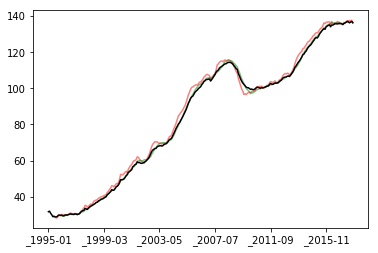

In [3]:
df.loc[:, 'trxnDate'] = pd.to_datetime(df['trxnDate'])

match_df = process_transactions(df)

XR, YR, DR = get_feature_matrix(match_df, start_year=start)
resultR = calculate_index(XR,YR,DR)
results_exp = pd.ewma(resultR, com=6)

ax2 = pd.Series(resultR, index=XR.columns).rolling(window=6).mean().plot(alpha=.5, color='r')
ax2 = pd.Series(resultR, index=XR.columns).rolling(window=12).mean().plot(alpha=.5, color='g')
pd.Series(results_exp, index=XR.columns).plot(ax=ax2, color='k')

In [4]:
chg = ((results_exp[list(XR.columns).index('_2017-11')]
        /results_exp[list(XR.columns).index('_2012-11')])**(1/5)-1)*100

print('%0.1f%% annual change in Downtown Manhattan sales prices since 2012.' % (chg))

5.1% annual change in Downtown Manhattan sales prices since 2012.
